In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from aif360.datasets import CompasDataset
import pandas as pd
from bias_processor import BiasMitigator


dataset2 = CompasDataset()


In [12]:
features = dataset2.features
feature_names = dataset2.feature_names
dataset2_df = pd.DataFrame(features, columns=feature_names)

In [13]:
dataset2_df

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,c_charge_degree=F,c_charge_degree=M,c_charge_desc=Abuse Without Great Harm,c_charge_desc=Agg Abuse Elderlly/Disabled Adult,c_charge_desc=Agg Assault W/int Com Fel Dome,c_charge_desc=Agg Battery Grt/Bod/Harm,c_charge_desc=Agg Fleeing and Eluding,c_charge_desc=Agg Fleeing/Eluding High Speed,"c_charge_desc=Aggr Child Abuse-Torture,Punish",c_charge_desc=Aggrav Battery w/Deadly Weapon,c_charge_desc=Aggrav Child Abuse-Agg Battery,c_charge_desc=Aggrav Child Abuse-Causes Harm,c_charge_desc=Aggrav Stalking After Injunctn,c_charge_desc=Aggravated Assault,c_charge_desc=Aggravated Assault W/Dead Weap,c_charge_desc=Aggravated Assault W/dead Weap,c_charge_desc=Aggravated Assault W/o Firearm,c_charge_desc=Aggravated Assault w/Firearm,c_charge_desc=Aggravated Battery,c_charge_desc=Aggravated Battery (Firearm),c_charge_desc=Aggravated Battery (Firearm/Actual Possession),c_charge_desc=Aggravated Battery / Pregnant,c_charge_desc=Aggravated Battery On 65/Older,c_charge_desc=Aide/Abet Prostitution Lewdness,c_charge_desc=Aiding Escape,c_charge_desc=Alcoholic Beverage Violation-FL,c_charge_desc=Armed Trafficking in Cannabis,c_charge_desc=Arson in the First Degree,c_charge_desc=Assault,c_charge_desc=Assault Law Enforcement Officer,c_charge_desc=Att Burgl Conv Occp,c_charge_desc=Att Burgl Struc/Conv Dwel/Occp,c_charge_desc=Att Burgl Unoccupied Dwel,c_charge_desc=Att Tamper w/Physical Evidence,c_charge_desc=Attempt Armed Burglary Dwell,c_charge_desc=Attempted Burg/Convey/Unocc,c_charge_desc=Attempted Burg/struct/unocc,c_charge_desc=Attempted Deliv Control Subst,c_charge_desc=Attempted Robbery No Weapon,c_charge_desc=Attempted Robbery Weapon,c_charge_desc=Battery,c_charge_desc=Battery Emergency Care Provide,c_charge_desc=Battery On A Person Over 65,c_charge_desc=Battery On Fire Fighter,c_charge_desc=Battery On Parking Enfor Speci,c_charge_desc=Battery Spouse Or Girlfriend,c_charge_desc=Battery on Law Enforc Officer,c_charge_desc=Battery on a Person Over 65,c_charge_desc=Bribery Athletic Contests,c_charge_desc=Burgl Dwel/Struct/Convey Armed,c_charge_desc=Burglary Assault/Battery Armed,c_charge_desc=Burglary Conveyance Armed,c_charge_desc=Burglary Conveyance Assault/Bat,c_charge_desc=Burglary Conveyance Occupied,c_charge_desc=Burglary Conveyance Unoccup,c_charge_desc=Burglary Dwelling Armed,c_charge_desc=Burglary Dwelling Assault/Batt,c_charge_desc=Burglary Dwelling Occupied,c_charge_desc=Burglary Structure Assault/Batt,c_charge_desc=Burglary Structure Occupied,c_charge_desc=Burglary Structure Unoccup,c_charge_desc=Burglary Unoccupied Dwelling,c_charge_desc=Burglary With Assault/battery,c_charge_desc=Carjacking w/o Deadly Weapon,c_charge_desc=Carjacking with a Firearm,c_charge_desc=Carry Open/Uncov Bev In Pub,c_charge_desc=Carrying A Concealed Weapon,c_charge_desc=Carrying Concealed Firearm,c_charge_desc=Cash Item w/Intent to Defraud,c_charge_desc=Child Abuse,c_charge_desc=Computer Pornography,c_charge_desc=Consp Traff Oxycodone 4g><14g,c_charge_desc=Conspiracy Dealing Stolen Prop,c_charge_desc=Consume Alcoholic Bev Pub,c_charge_desc=Contradict Statement,c_charge_desc=Contribute Delinquency Of A Minor,c_charge_desc=Corrupt Public Servant,c_charge_desc=Counterfeit Lic Plates/Sticker,c_charge_desc=Crim Attempt/Solic/Consp,c_charge_desc=Crim Use of Personal ID Info,c_charge_desc=Crimin Mischief Damage $1000+,c_charge_desc=Criminal Mischief,c_charge_desc=Criminal Mischief Damage <$200,c_charge_desc=Criminal Mischief>$200<$1000,c_charge_desc=Crlty Twrd Child Urge Oth Act,c_charge_desc=Cruelty Toward Child,c_charge_desc=Cruelty to Animals,c_charge_desc=Culpable Negligence,c_charge_desc=D.U.I. Serious Bodily Injury,c_charge_desc=DOC/Cause Public Danger,c_charge_desc=DUI - Enhanced,c_charge_desc=DUI - Property Damage/Personal Injury,c_charge_desc=DUI Blood Alcohol Above 0.20,c_charge_desc=DUI Level 0.15 Or Minor In Veh,c_charge_desc

In [3]:
compas = pd.read_csv("cox-violent-parsed.csv")
compas_aif = pd.read_csv("compas_dataset.csv")

In [4]:
row,column=compas.shape
print(f"The compas dataset contain {row} rows and {column} columns")

The compas dataset contain 18316 rows and 52 columns


In [5]:
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [14]:
dataset2_df.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,c_charge_degree=F,c_charge_degree=M,c_charge_desc=Abuse Without Great Harm,c_charge_desc=Agg Abuse Elderlly/Disabled Adult,c_charge_desc=Agg Assault W/int Com Fel Dome,c_charge_desc=Agg Battery Grt/Bod/Harm,c_charge_desc=Agg Fleeing and Eluding,c_charge_desc=Agg Fleeing/Eluding High Speed,"c_charge_desc=Aggr Child Abuse-Torture,Punish",c_charge_desc=Aggrav Battery w/Deadly Weapon,c_charge_desc=Aggrav Child Abuse-Agg Battery,c_charge_desc=Aggrav Child Abuse-Causes Harm,c_charge_desc=Aggrav Stalking After Injunctn,c_charge_desc=Aggravated Assault,c_charge_desc=Aggravated Assault W/Dead Weap,c_charge_desc=Aggravated Assault W/dead Weap,c_charge_desc=Aggravated Assault W/o Firearm,c_charge_desc=Aggravated Assault w/Firearm,c_charge_desc=Aggravated Battery,c_charge_desc=Aggravated Battery (Firearm),c_charge_desc=Aggravated Battery (Firearm/Actual Possession),c_charge_desc=Aggravated Battery / Pregnant,c_charge_desc=Aggravated Battery On 65/Older,c_charge_desc=Aide/Abet Prostitution Lewdness,c_charge_desc=Aiding Escape,c_charge_desc=Alcoholic Beverage Violation-FL,c_charge_desc=Armed Trafficking in Cannabis,c_charge_desc=Arson in the First Degree,c_charge_desc=Assault,c_charge_desc=Assault Law Enforcement Officer,c_charge_desc=Att Burgl Conv Occp,c_charge_desc=Att Burgl Struc/Conv Dwel/Occp,c_charge_desc=Att Burgl Unoccupied Dwel,c_charge_desc=Att Tamper w/Physical Evidence,c_charge_desc=Attempt Armed Burglary Dwell,c_charge_desc=Attempted Burg/Convey/Unocc,c_charge_desc=Attempted Burg/struct/unocc,c_charge_desc=Attempted Deliv Control Subst,c_charge_desc=Attempted Robbery No Weapon,c_charge_desc=Attempted Robbery Weapon,c_charge_desc=Battery,c_charge_desc=Battery Emergency Care Provide,c_charge_desc=Battery On A Person Over 65,c_charge_desc=Battery On Fire Fighter,c_charge_desc=Battery On Parking Enfor Speci,c_charge_desc=Battery Spouse Or Girlfriend,c_charge_desc=Battery on Law Enforc Officer,c_charge_desc=Battery on a Person Over 65,c_charge_desc=Bribery Athletic Contests,c_charge_desc=Burgl Dwel/Struct/Convey Armed,c_charge_desc=Burglary Assault/Battery Armed,c_charge_desc=Burglary Conveyance Armed,c_charge_desc=Burglary Conveyance Assault/Bat,c_charge_desc=Burglary Conveyance Occupied,c_charge_desc=Burglary Conveyance Unoccup,c_charge_desc=Burglary Dwelling Armed,c_charge_desc=Burglary Dwelling Assault/Batt,c_charge_desc=Burglary Dwelling Occupied,c_charge_desc=Burglary Structure Assault/Batt,c_charge_desc=Burglary Structure Occupied,c_charge_desc=Burglary Structure Unoccup,c_charge_desc=Burglary Unoccupied Dwelling,c_charge_desc=Burglary With Assault/battery,c_charge_desc=Carjacking w/o Deadly Weapon,c_charge_desc=Carjacking with a Firearm,c_charge_desc=Carry Open/Uncov Bev In Pub,c_charge_desc=Carrying A Concealed Weapon,c_charge_desc=Carrying Concealed Firearm,c_charge_desc=Cash Item w/Intent to Defraud,c_charge_desc=Child Abuse,c_charge_desc=Computer Pornography,c_charge_desc=Consp Traff Oxycodone 4g><14g,c_charge_desc=Conspiracy Dealing Stolen Prop,c_charge_desc=Consume Alcoholic Bev Pub,c_charge_desc=Contradict Statement,c_charge_desc=Contribute Delinquency Of A Minor,c_charge_desc=Corrupt Public Servant,c_charge_desc=Counterfeit Lic Plates/Sticker,c_charge_desc=Crim Attempt/Solic/Consp,c_charge_desc=Crim Use of Personal ID Info,c_charge_desc=Crimin Mischief Damage $1000+,c_charge_desc=Criminal Mischief,c_charge_desc=Criminal Mischief Damage <$200,c_charge_desc=Criminal Mischief>$200<$1000,c_charge_desc=Crlty Twrd Child Urge Oth Act,c_charge_desc=Cruelty Toward Child,c_charge_desc=Cruelty to Animals,c_charge_desc=Culpable Negligence,c_charge_desc=D.U.I. Serious Bodily Injury,c_charge_desc=DOC/Cause Public Danger,c_charge_desc=DUI - Enhanced,c_charge_desc=DUI - Property Damage/Personal Injury,c_charge_desc=DUI Blood Alcohol Above 0.20,c_charge_desc=DUI Level 0.15 Or Minor In Veh,c_charge_desc

In [29]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   compas_screening_date    18316 non-null  object 
 5   sex                      18316 non-null  object 
 6   dob                      18316 non-null  object 
 7   age                      18316 non-null  int64  
 8   age_cat                  18316 non-null  object 
 9   race                     18316 non-null  object 
 10  juv_fel_count            18316 non-null  int64  
 11  decile_score             18316 non-null  int64  
 12  juv_misd_count           18316 non-null  int64  
 13  juv_other_count          18316 non-null  int64  
 14  priors_count          

In [30]:

#This drop({[]}) will remove all the column listed that are not needed for the analysis

compas = compas.drop(['last','first','out_custody','in_custody','c_offense_date','decile_score.1','priors_count.1','c_case_number','days_b_screening_arrest','start','end','event','screening_date','c_case_number','juv_other_count','juv_misd_count','juv_fel_count','r_days_from_arrest','id','r_charge_degree','r_offense_date', 'vr_case_number','r_case_number','r_jail_out','c_arrest_date','r_charge_desc','r_jail_in', 'violent_recid','vr_charge_degree','vr_offense_date','vr_charge_desc'], axis=1)

In [17]:
dataset2_df.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,c_charge_degree=F,c_charge_degree=M,c_charge_desc=Abuse Without Great Harm,c_charge_desc=Agg Abuse Elderlly/Disabled Adult,c_charge_desc=Agg Assault W/int Com Fel Dome,c_charge_desc=Agg Battery Grt/Bod/Harm,c_charge_desc=Agg Fleeing and Eluding,c_charge_desc=Agg Fleeing/Eluding High Speed,"c_charge_desc=Aggr Child Abuse-Torture,Punish",c_charge_desc=Aggrav Battery w/Deadly Weapon,c_charge_desc=Aggrav Child Abuse-Agg Battery,c_charge_desc=Aggrav Child Abuse-Causes Harm,c_charge_desc=Aggrav Stalking After Injunctn,c_charge_desc=Aggravated Assault,c_charge_desc=Aggravated Assault W/Dead Weap,c_charge_desc=Aggravated Assault W/dead Weap,c_charge_desc=Aggravated Assault W/o Firearm,c_charge_desc=Aggravated Assault w/Firearm,c_charge_desc=Aggravated Battery,c_charge_desc=Aggravated Battery (Firearm),c_charge_desc=Aggravated Battery (Firearm/Actual Possession),c_charge_desc=Aggravated Battery / Pregnant,c_charge_desc=Aggravated Battery On 65/Older,c_charge_desc=Aide/Abet Prostitution Lewdness,c_charge_desc=Aiding Escape,c_charge_desc=Alcoholic Beverage Violation-FL,c_charge_desc=Armed Trafficking in Cannabis,c_charge_desc=Arson in the First Degree,c_charge_desc=Assault,c_charge_desc=Assault Law Enforcement Officer,c_charge_desc=Att Burgl Conv Occp,c_charge_desc=Att Burgl Struc/Conv Dwel/Occp,c_charge_desc=Att Burgl Unoccupied Dwel,c_charge_desc=Att Tamper w/Physical Evidence,c_charge_desc=Attempt Armed Burglary Dwell,c_charge_desc=Attempted Burg/Convey/Unocc,c_charge_desc=Attempted Burg/struct/unocc,c_charge_desc=Attempted Deliv Control Subst,c_charge_desc=Attempted Robbery No Weapon,c_charge_desc=Attempted Robbery Weapon,c_charge_desc=Battery,c_charge_desc=Battery Emergency Care Provide,c_charge_desc=Battery On A Person Over 65,c_charge_desc=Battery On Fire Fighter,c_charge_desc=Battery On Parking Enfor Speci,c_charge_desc=Battery Spouse Or Girlfriend,c_charge_desc=Battery on Law Enforc Officer,c_charge_desc=Battery on a Person Over 65,c_charge_desc=Bribery Athletic Contests,c_charge_desc=Burgl Dwel/Struct/Convey Armed,c_charge_desc=Burglary Assault/Battery Armed,c_charge_desc=Burglary Conveyance Armed,c_charge_desc=Burglary Conveyance Assault/Bat,c_charge_desc=Burglary Conveyance Occupied,c_charge_desc=Burglary Conveyance Unoccup,c_charge_desc=Burglary Dwelling Armed,c_charge_desc=Burglary Dwelling Assault/Batt,c_charge_desc=Burglary Dwelling Occupied,c_charge_desc=Burglary Structure Assault/Batt,c_charge_desc=Burglary Structure Occupied,c_charge_desc=Burglary Structure Unoccup,c_charge_desc=Burglary Unoccupied Dwelling,c_charge_desc=Burglary With Assault/battery,c_charge_desc=Carjacking w/o Deadly Weapon,c_charge_desc=Carjacking with a Firearm,c_charge_desc=Carry Open/Uncov Bev In Pub,c_charge_desc=Carrying A Concealed Weapon,c_charge_desc=Carrying Concealed Firearm,c_charge_desc=Cash Item w/Intent to Defraud,c_charge_desc=Child Abuse,c_charge_desc=Computer Pornography,c_charge_desc=Consp Traff Oxycodone 4g><14g,c_charge_desc=Conspiracy Dealing Stolen Prop,c_charge_desc=Consume Alcoholic Bev Pub,c_charge_desc=Contradict Statement,c_charge_desc=Contribute Delinquency Of A Minor,c_charge_desc=Corrupt Public Servant,c_charge_desc=Counterfeit Lic Plates/Sticker,c_charge_desc=Crim Attempt/Solic/Consp,c_charge_desc=Crim Use of Personal ID Info,c_charge_desc=Crimin Mischief Damage $1000+,c_charge_desc=Criminal Mischief,c_charge_desc=Criminal Mischief Damage <$200,c_charge_desc=Criminal Mischief>$200<$1000,c_charge_desc=Crlty Twrd Child Urge Oth Act,c_charge_desc=Cruelty Toward Child,c_charge_desc=Cruelty to Animals,c_charge_desc=Culpable Negligence,c_charge_desc=D.U.I. Serious Bodily Injury,c_charge_desc=DOC/Cause Public Danger,c_charge_desc=DUI - Enhanced,c_charge_desc=DUI - Property Damage/Personal Injury,c_charge_desc=DUI Blood Alcohol Above 0.20,c_charge_desc=DUI Level 0.15 Or Minor In Veh,c_charge_desc

In [19]:

dataset2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 401 entries, sex to c_charge_desc=arrest case no charge
dtypes: float64(401)
memory usage: 18.9 MB


,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=25 - 45,age_cat=Greater than 45,age_cat=Less than 25,c_charge_degree=F,c_charge_degree=M,c_charge_desc=Abuse Without Great Harm,c_charge_desc=Agg Abuse Elderlly/Disabled Adult,c_charge_desc=Agg Assault W/int Com Fel Dome,c_charge_desc=Agg Battery Grt/Bod/Harm,c_charge_desc=Agg Fleeing and Eluding,c_charge_desc=Agg Fleeing/Eluding High Speed,"c_charge_desc=Aggr Child Abuse-Torture,Punish",c_charge_desc=Aggrav Battery w/Deadly Weapon,c_charge_desc=Aggrav Child Abuse-Agg Battery,c_charge_desc=Aggrav Child Abuse-Causes Harm,c_charge_desc=Aggrav Stalking After Injunctn,c_charge_desc=Aggravated Assault,c_charge_desc=Aggravated Assault W/Dead Weap,c_charge_desc=Aggravated Assault W/dead Weap,c_charge_desc=Aggravated Assault W/o Firearm,c_charge_desc=Aggravated Assault w/Firearm,c_charge_desc=Aggravated Battery,c_charge_desc=Aggravated Battery (Firearm),c_charge_desc=Aggravated Battery (Firearm/Actual Possession),c_charge_desc=Aggravated Battery / Pregnant,c_charge_desc=Aggravated Battery On 65/Older,c_charge_desc=Aide/Abet Prostitution Lewdness,c_charge_desc=Aiding Escape,c_charge_desc=Alcoholic Beverage Violation-FL,c_charge_desc=Armed Trafficking in Cannabis,c_charge_desc=Arson in the First Degree,c_charge_desc=Assault,c_charge_desc=Assault Law Enforcement Officer,c_charge_desc=Att Burgl Conv Occp,c_charge_desc=Att Burgl Struc/Conv Dwel/Occp,c_charge_desc=Att Burgl Unoccupied Dwel,c_charge_desc=Att Tamper w/Physical Evidence,c_charge_desc=Attempt Armed Burglary Dwell,c_charge_desc=Attempted Burg/Convey/Unocc,c_charge_desc=Attempted Burg/struct/unocc,c_charge_desc=Attempted Deliv Control Subst,c_charge_desc=Attempted Robbery No Weapon,c_charge_desc=Attempted Robbery Weapon,c_charge_desc=Battery,c_charge_desc=Battery Emergency Care Provide,c_charge_desc=Battery On A Person Over 65,c_charge_desc=Battery On Fire Fighter,c_charge_desc=Battery On Parking Enfor Speci,c_charge_desc=Battery Spouse Or Girlfriend,c_charge_desc=Battery on Law Enforc Officer,c_charge_desc=Battery on a Person Over 65,c_charge_desc=Bribery Athletic Contests,c_charge_desc=Burgl Dwel/Struct/Convey Armed,c_charge_desc=Burglary Assault/Battery Armed,c_charge_desc=Burglary Conveyance Armed,c_charge_desc=Burglary Conveyance Assault/Bat,c_charge_desc=Burglary Conveyance Occupied,c_charge_desc=Burglary Conveyance Unoccup,c_charge_desc=Burglary Dwelling Armed,c_charge_desc=Burglary Dwelling Assault/Batt,c_charge_desc=Burglary Dwelling Occupied,c_charge_desc=Burglary Structure Assault/Batt,c_charge_desc=Burglary Structure Occupied,c_charge_desc=Burglary Structure Unoccup,c_charge_desc=Burglary Unoccupied Dwelling,c_charge_desc=Burglary With Assault/battery,c_charge_desc=Carjacking w/o Deadly Weapon,c_charge_desc=Carjacking with a Firearm,c_charge_desc=Carry Open/Uncov Bev In Pub,c_charge_desc=Carrying A Concealed Weapon,c_charge_desc=Carrying Concealed Firearm,c_charge_desc=Cash Item w/Intent to Defraud,c_charge_desc=Child Abuse,c_charge_desc=Computer Pornography,c_charge_desc=Consp Traff Oxycodone 4g><14g,c_charge_desc=Conspiracy Dealing Stolen Prop,c_charge_desc=Consume Alcoholic Bev Pub,c_charge_desc=Contradict Statement,c_charge_desc=Contribute Delinquency Of A Minor,c_charge_desc=Corrupt Public Servant,c_charge_desc=Counterfeit Lic Plates/Sticker,c_charge_desc=Crim Attempt/Solic/Consp,c_charge_desc=Crim Use of Personal ID Info,c_charge_desc=Crimin Mischief Damage $1000+,c_charge_desc=Criminal Mischief,c_charge_desc=Criminal Mischief Damage <$200,c_charge_desc=Criminal Mischief>$200<$1000,c_charge_desc=Crlty Twrd Child Urge Oth Act,c_charge_desc=Cruelty Toward Child,c_charge_desc=Cruelty to Animals,c_charge_desc=Culpable Negligence,c_charge_desc=D.U.I. Serious Bodily Injury,c_charge_desc=DOC/Cause Public Danger,c_charge_desc=DUI - Enhanced,c_charge_desc=DUI - Property Damage/Personal Injury,c_charge_desc=DUI Blood Alcohol Above 0.20,c_charge_desc=DUI Level 0.15 Or Minor In Veh,c_charge_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 401 entries, sex to c_charge_desc=arrest case no charge
dtypes: float64(401)
memory usage: 18.9 MB


In [31]:

#This is to change the data type from object to date

compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'])
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'])
compas['days_in_jail'] = abs((compas['c_jail_out'] - compas['c_jail_in']).dt.days)
compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'])
compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'])

In [32]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18316 non-null  object        
 1   compas_screening_date  18316 non-null  datetime64[ns]
 2   sex                    18316 non-null  object        
 3   dob                    18316 non-null  object        
 4   age                    18316 non-null  int64         
 5   age_cat                18316 non-null  object        
 6   race                   18316 non-null  object        
 7   decile_score           18316 non-null  int64         
 8   priors_count           18316 non-null  int64         
 9   c_jail_in              17019 non-null  datetime64[ns]
 10  c_jail_out             17019 non-null  datetime64[ns]
 11  c_days_from_compas     17449 non-null  float64       
 12  c_charge_degree        17449 non-null  object        
 13  c

In [33]:
#data.isnull().sum() is used to get the number of missing records in each column

print("The sum of Null values in each columns ")

compas.isnull().sum()

The sum of Null values in each columns 


name                        0
compas_screening_date       0
sex                         0
dob                         0
age                         0
age_cat                     0
race                        0
decile_score                0
priors_count                0
c_jail_in                1297
c_jail_out               1297
c_days_from_compas        867
c_charge_degree           867
c_charge_desc             881
is_recid                    0
is_violent_recid            0
type_of_assessment          0
score_text                 23
v_type_of_assessment        0
v_decile_score              0
v_score_text                6
v_screening_date            0
days_in_jail             1297
dtype: int64

In [34]:
# Impute missing values for numerical variables
numeric_cols = ['c_days_from_compas', 'v_decile_score']
for col in numeric_cols:
    compas[col].fillna(compas[col].median(), inplace=True)

# Impute missing values for categorical variables
categorical_cols = ['c_charge_degree', 'score_text', 'v_score_text', 'c_jail_in', 'c_jail_out', 'c_charge_desc', 'days_in_jail']
for col in categorical_cols:
    compas[col].fillna(compas[col].mode()[0], inplace=True)

# Check if there are any missing values remaining
print(compas.isnull().sum())

name                     0
compas_screening_date    0
sex                      0
dob                      0
age                      0
age_cat                  0
race                     0
decile_score             0
priors_count             0
c_jail_in                0
c_jail_out               0
c_days_from_compas       0
c_charge_degree          0
c_charge_desc            0
is_recid                 0
is_violent_recid         0
type_of_assessment       0
score_text               0
v_type_of_assessment     0
v_decile_score           0
v_score_text             0
v_screening_date         0
days_in_jail             0
dtype: int64


The code above replace the missing value in numerical column with the column's median while it does the same in categorical column using the column's mode

In [12]:
compas.describe()

,compas_screening_date,age,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,is_recid,is_violent_recid,v_decile_score,v_screening_date,days_in_jail
count,18316,18316.000000,18316.000000,18316.000000,18316,18316,18316.000000,18316.000000,18316.000000,18316.000000,18316,18316.000000
mean,2013-11-22 23:28:18.973574912,34.019273,4.997052,3.913191,2013-11-06 20:46:19.209434624,2013-12-06 14:03:25.459707392,55.010919,0.414774,0.073105,4.022822,2013-11-22 23:28:18.973574912,23.293514
min,2013-01-01 00:00:00,18.000000,-1.000000,0.000000,2013-01-01 01:31:00,2013-01-02 01:12:00,0.000000,-1.000000,0.000000,-1.000000,2013-01-01 00:00:00,0.000000
25%,2013-04-22 00:00:00,25.000000,2.000000,0.000000,2013-03-30 01:04:00,2013-04-30 07:29:00,1.000000,0.000000,0.000000,2.000000,2013-04-22 00:00:00,0.000000
50%,2013-11-08 00:00:00,31.000000,5.000000,2.000000,2013-10-18 01:38:00,2013-11-13 01:00:00,1.000000,0.000000,0.000000,4.000000,2013-11-08 00:00:00,1.000000
75%,2014-05-29 00:00:00,41.000000,8.000000,5.000000,2014-05-15 10:48:00,2014-06-10 07:35:00,2.000000,1.000000,0.000000,6.000000,2014-05-29 00:00:00,14.000000
max,2014-12-31 00:00:00,96.000000,10.000000,43.000000,2016-03-11 10:26:00,2020-01-01 00:00:00,9485.000000,1.000000,1.000000,10.000000,2014-12-31 00:00:00,2152.000000
std,NaN,11.667811,2.937569,5.299864,NaN,NaN,310.610219,0.576449,0.260317,2.614189,NaN,64.917074


### Data_Visualisation

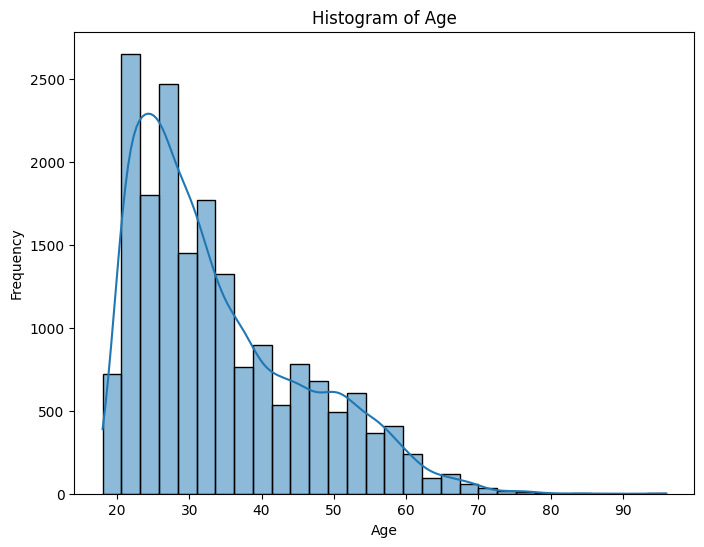

In [13]:
# Plot histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=compas, x='age', bins=30, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

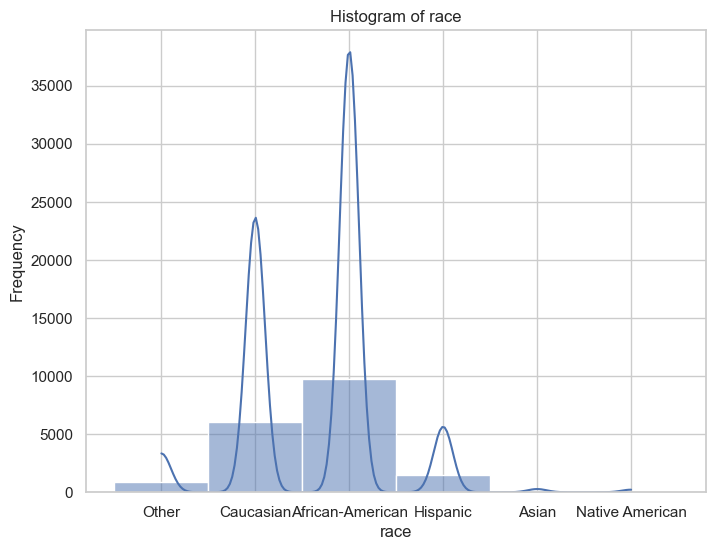

In [35]:
# Plot histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=compas, x='race', bins=30, kde=True)
plt.title('Histogram of race')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.show()

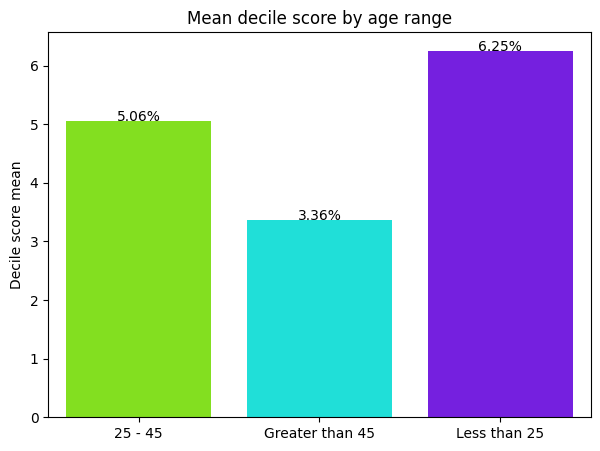

In [14]:
# Plot bar mean decile score of age range

decile_mean_age = compas.groupby("age_cat")["decile_score"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=decile_mean_age, x="age_cat", y="decile_score", 
            palette=sns.color_palette("hsv", len(decile_mean_age)))

plt.ylabel("Decile score mean")
plt.xlabel("")
plt.title("Mean decile score by age range")

# Add percentage labels to each bar
for index, row in decile_mean_age.iterrows():
    plt.text(index, row['decile_score'], f"{row['decile_score']:.2f}%", 
             color='black', ha="center")

plt.show(block=False)

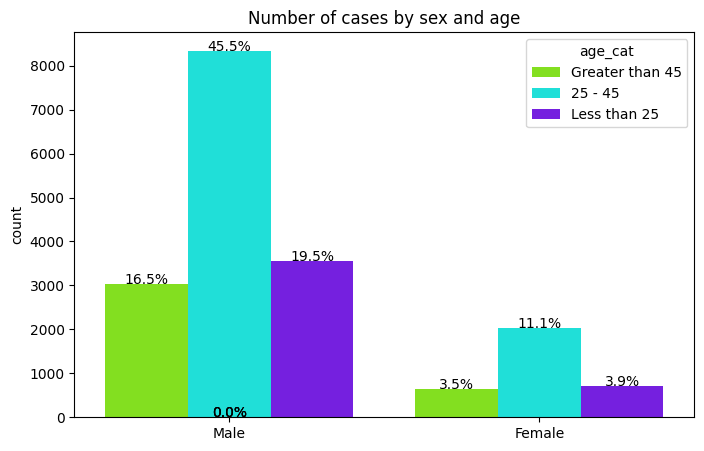

In [16]:
# Plot Count number of cases by sex and age

plt.figure(figsize=(8, 5)) 
ax = sns.countplot(data=compas, x="sex", hue="age_cat", palette=sns.color_palette("hsv", 3)) 
plt.title("Number of cases by sex and age") 
plt.xlabel("") 

# Calculate total count for each category
total_counts = compas.groupby(['sex', 'age_cat']).size().reset_index(name='total_count')

# Add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1, f'{100 * height / total_counts["total_count"].sum():.1f}%', ha="center")

plt.show(block=False)

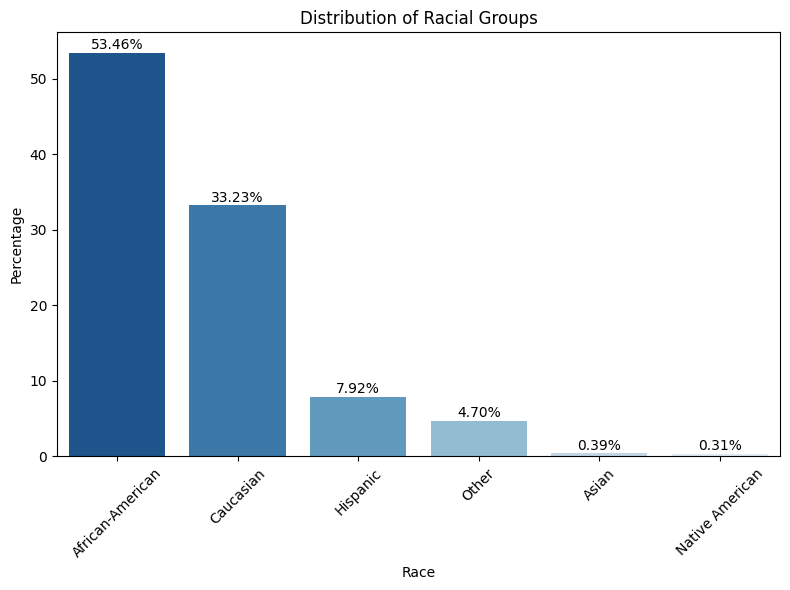

In [18]:

# Calculate percentage of each race
race_percentage = compas['race'].value_counts(normalize=True) * 100

# Sort races by count in descending order
race_percentage = race_percentage.sort_values(ascending=False)

# Visualize race distribution with percentage labels
plt.figure(figsize=(8, 6))
sns.barplot(x=race_percentage.index, y=race_percentage.values, palette="Blues_r")

# Add percentage labels to each bar
for i, val in enumerate(race_percentage.values):
    plt.text(i, val + 0.5, f"{val:.2f}%", ha="center")

plt.title('Distribution of Racial Groups')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

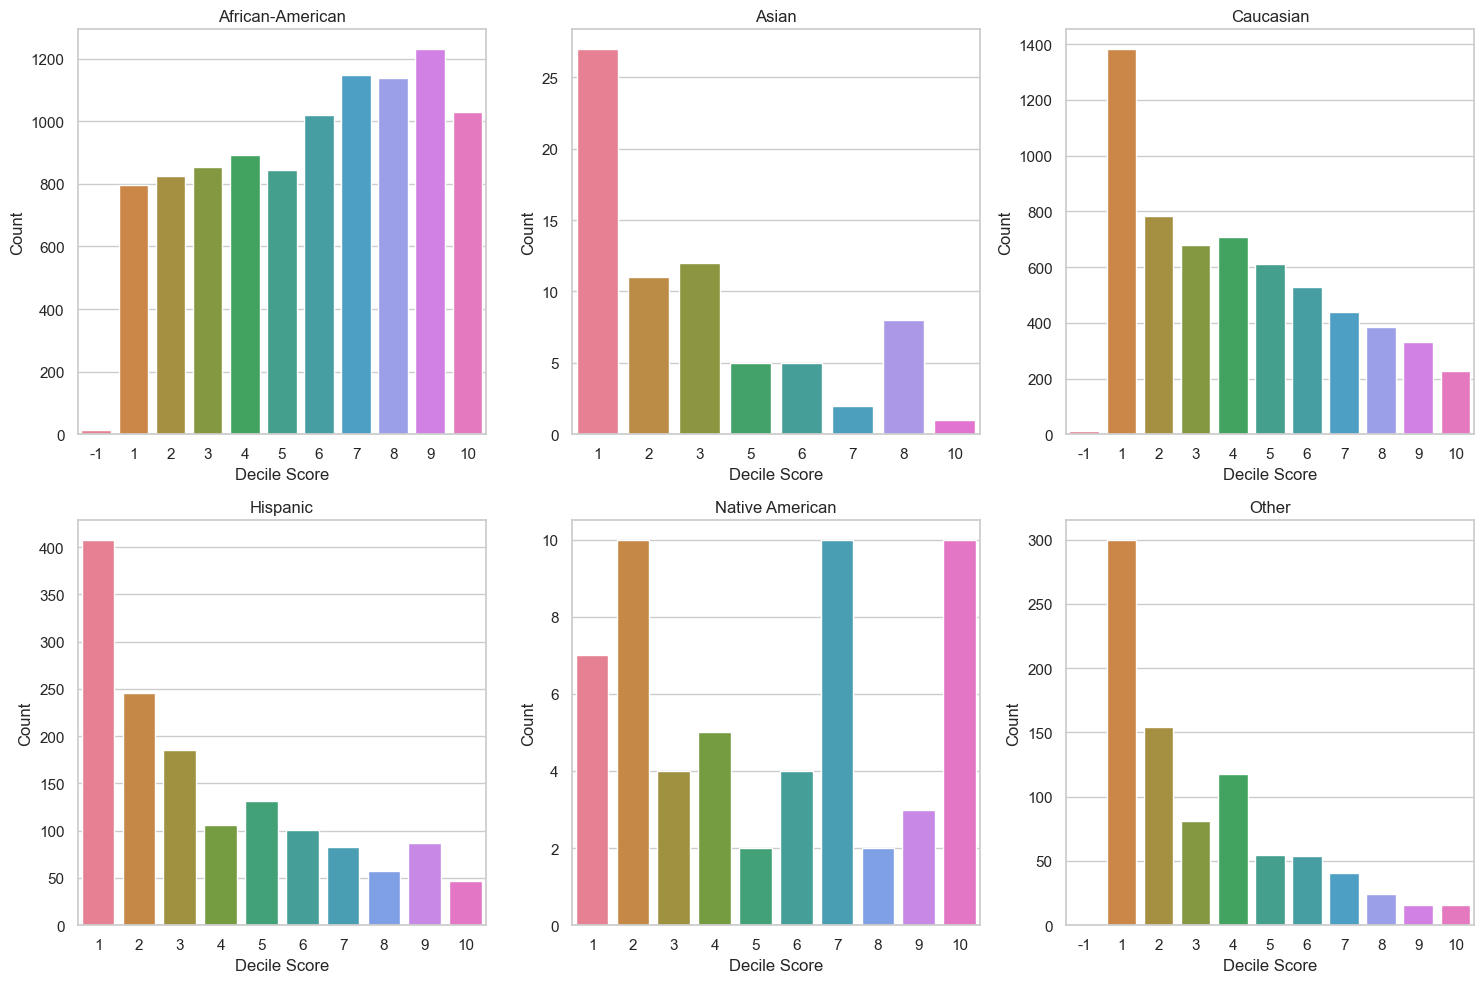

In [19]:
# Define a list of racial groups
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grid of count plots for each race's decile scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, race in enumerate(racial_groups):
    # Filter the dataframe for the current racial group
    race_data = compas[compas['race'] == race]
    
    # Create a count plot for the decile scores of the current racial group
    sns.countplot(x='decile_score', data=race_data, ax=axes[i], palette='husl')
    axes[i].set_title(race)
    axes[i].set_xlabel('Decile Score')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

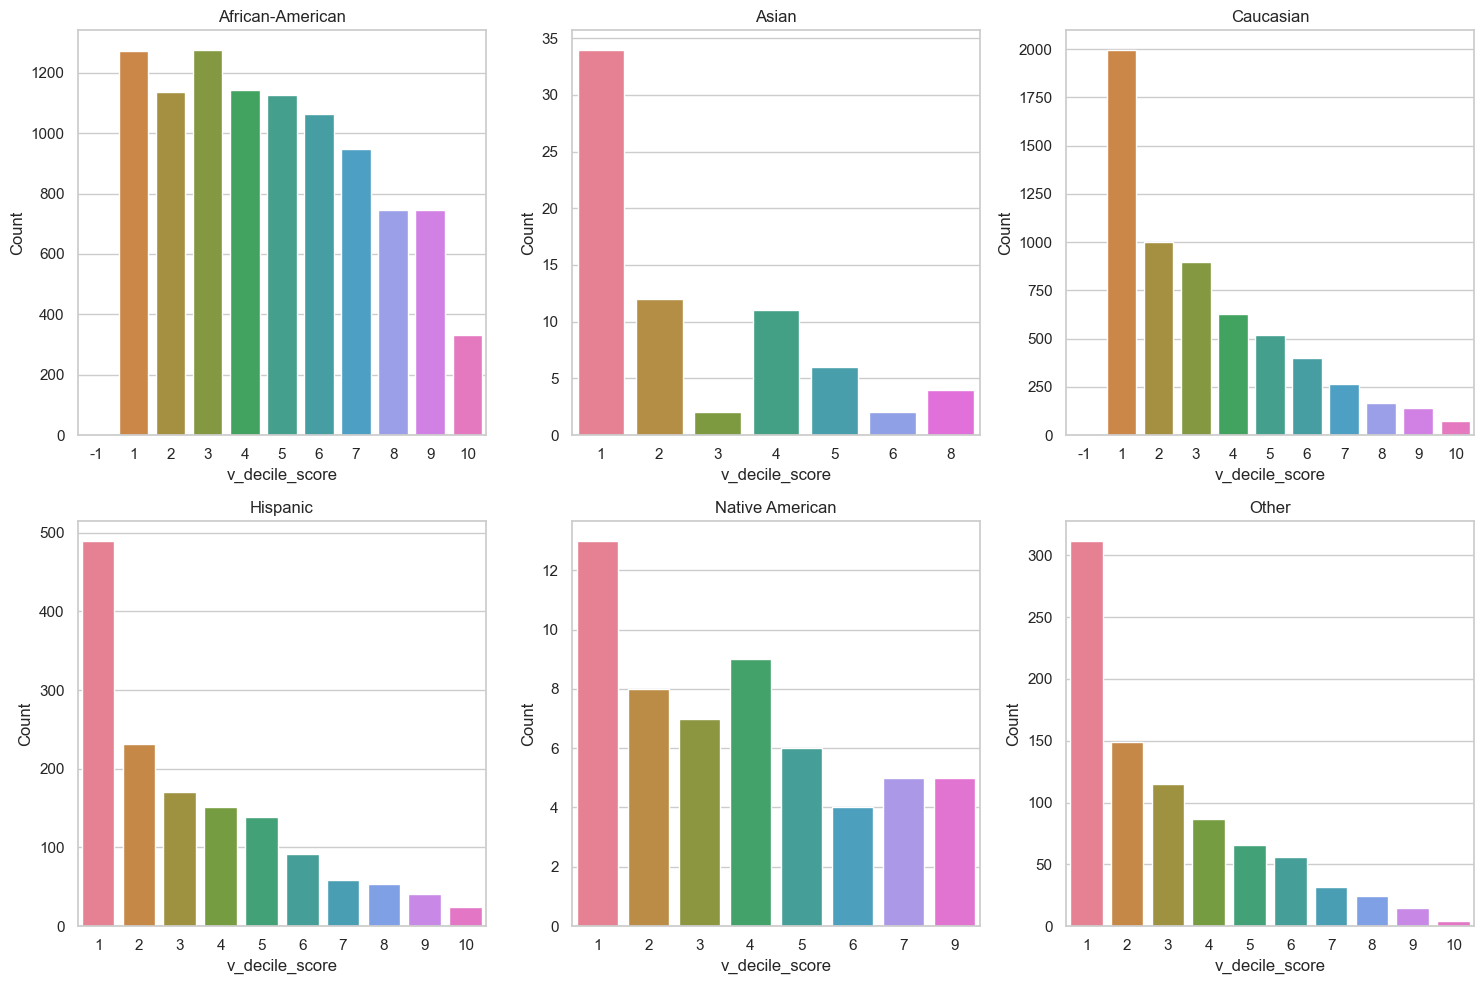

In [20]:
# Define a list of racial groups
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grid of count plots for each race's v_decile_scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, race in enumerate(racial_groups):
    # Filter the dataframe for the current racial group
    race_data = compas[compas['race'] == race]
    
    # Create a count plot for the v_decile_scores of the current racial group
    sns.countplot(x='v_decile_score', data=race_data, ax=axes[i], palette='husl')
    axes[i].set_title(race)
    axes[i].set_xlabel('v_decile_score')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

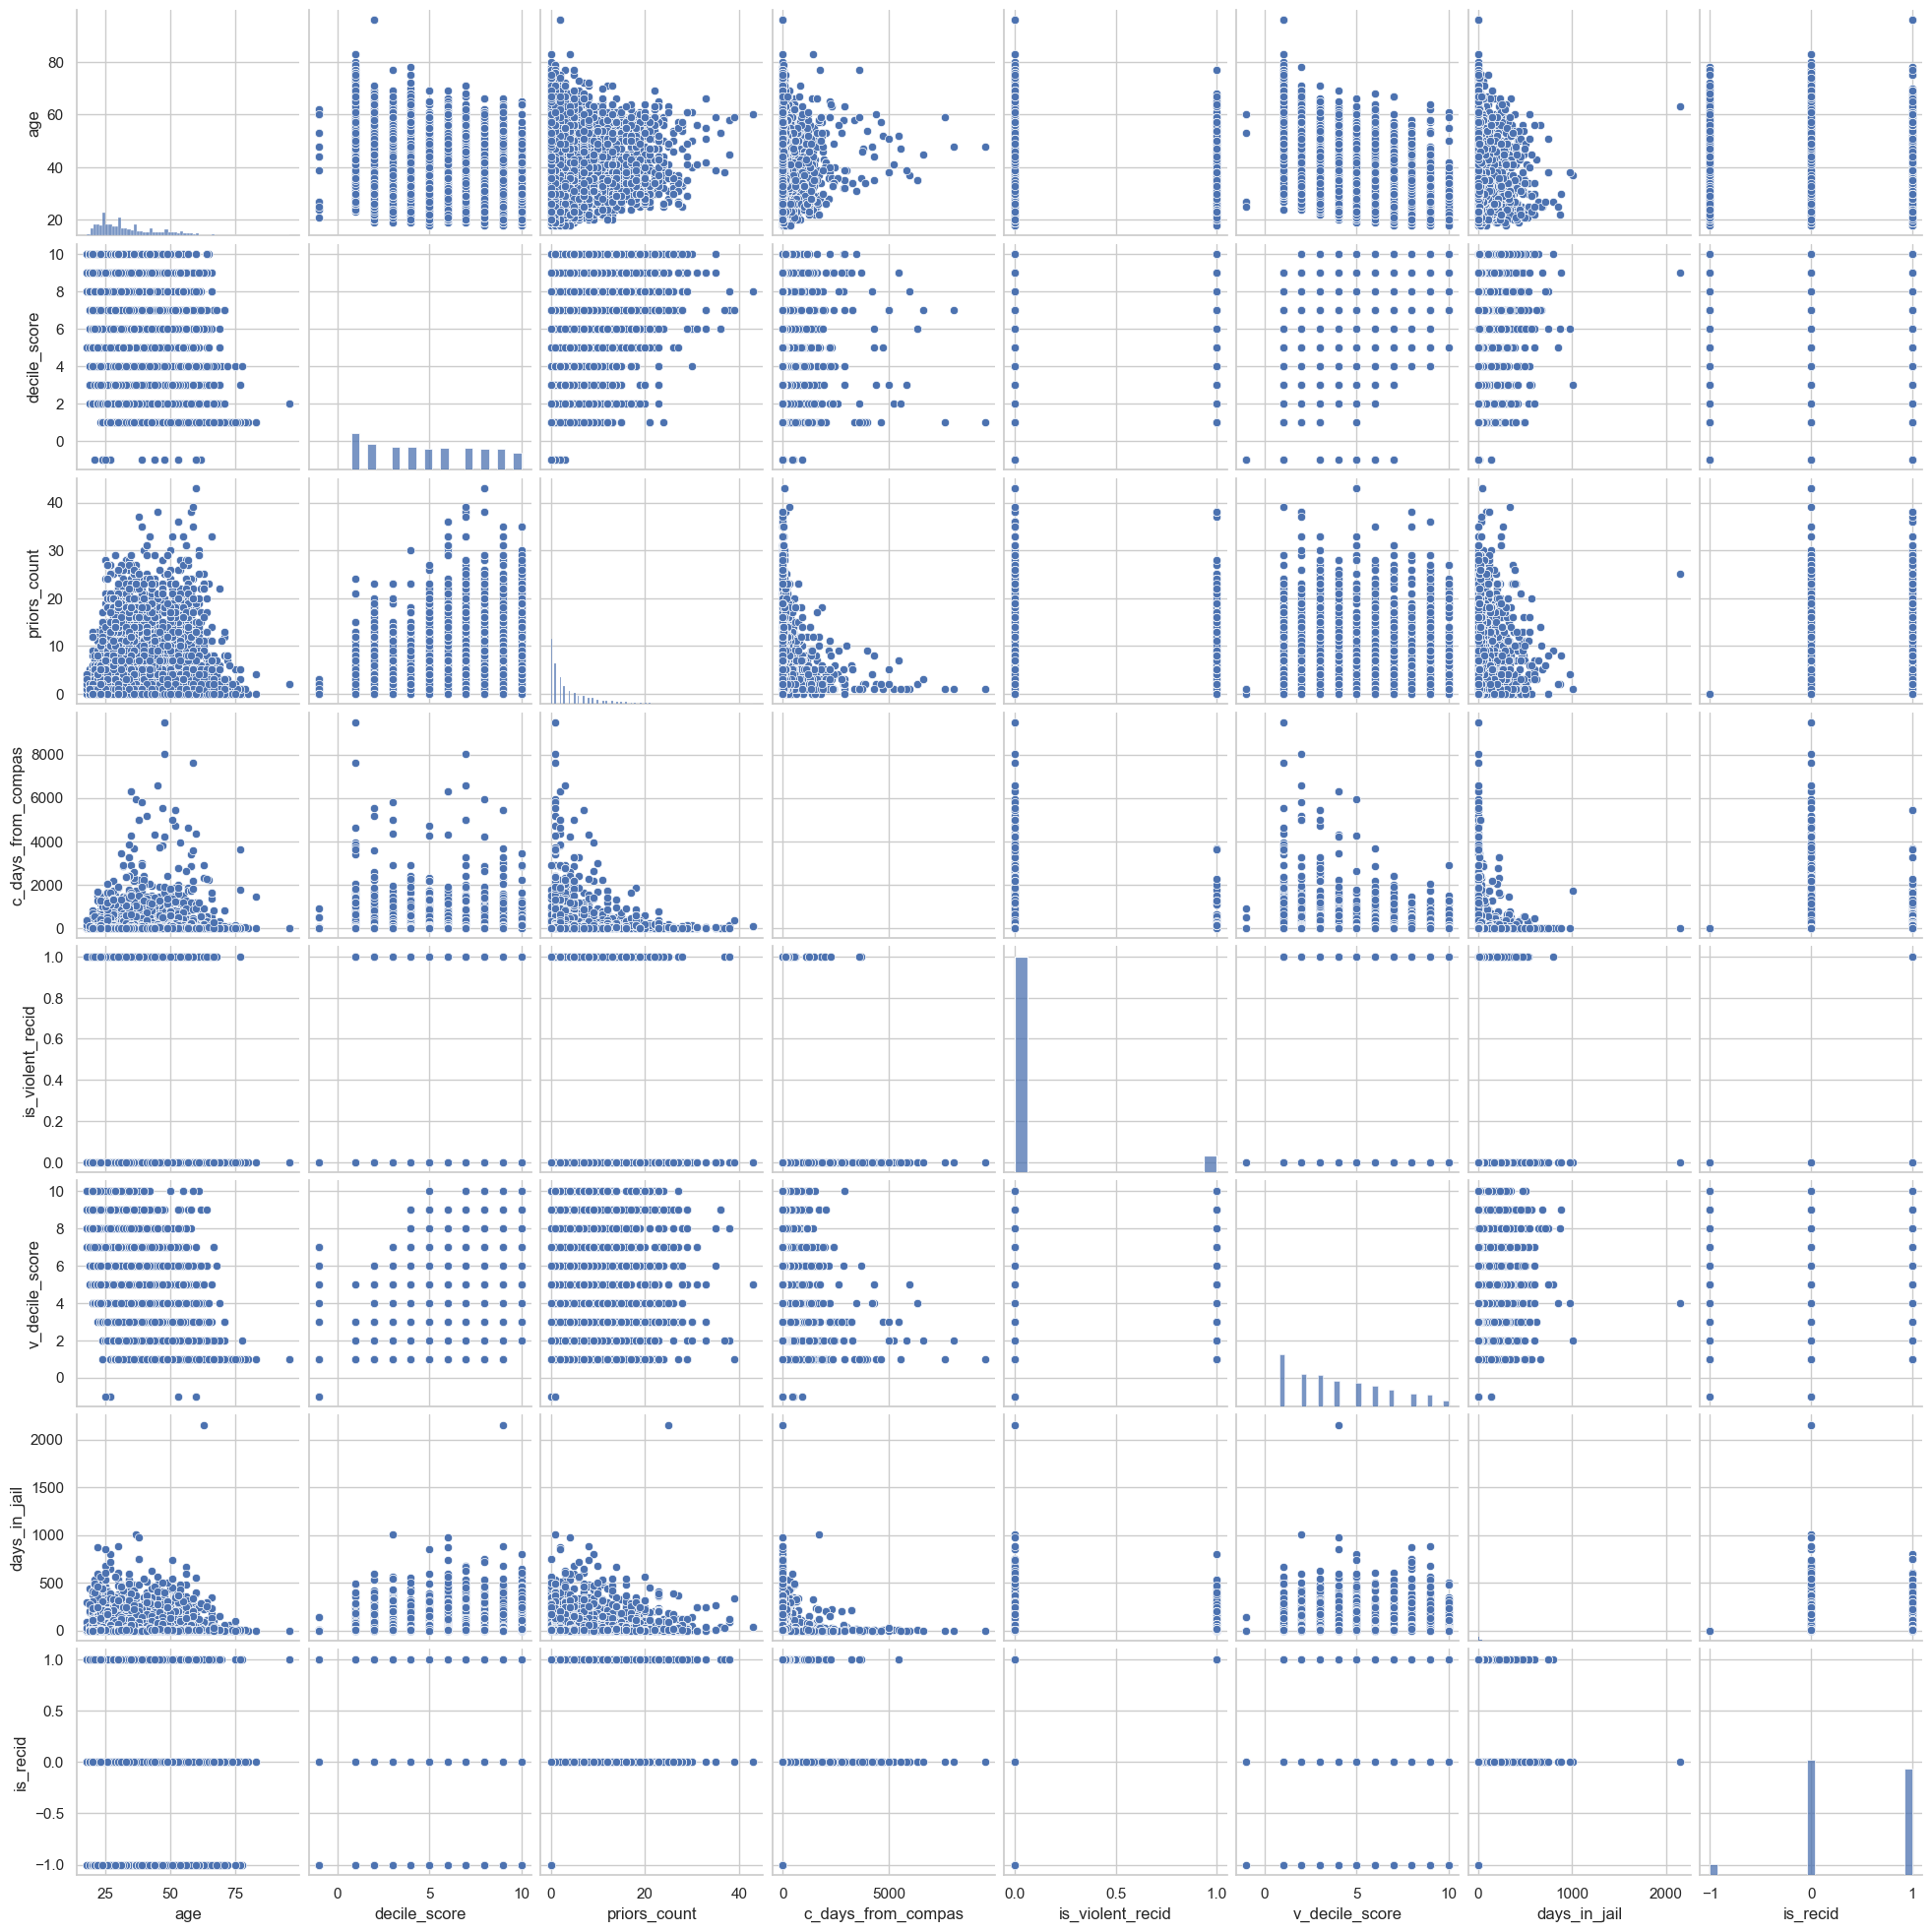

In [21]:
sns.pairplot(compas[['age', 'decile_score', 'priors_count', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score', 'days_in_jail', 'is_recid']])
plt.show()

In [22]:

compas["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)

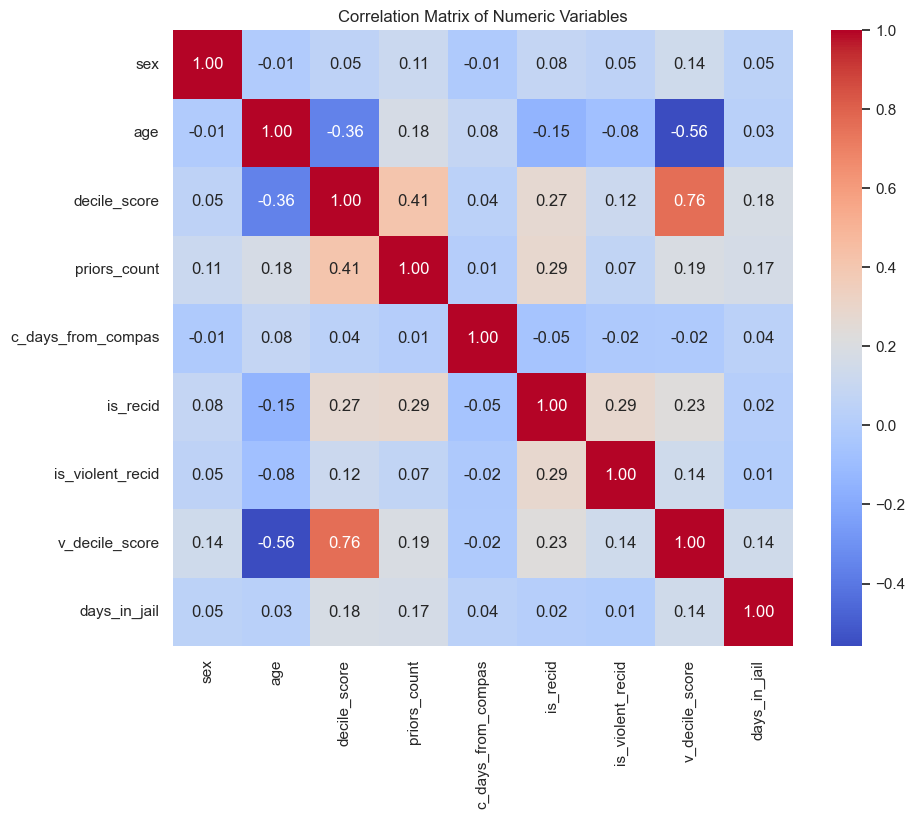

In [24]:

# Filter out object variables
numeric_variables = compas.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_variables.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()